In [33]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [1]:
from google.colab import files
uploaded = files.upload()

Saving test_images.npy to test_images.npy


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train_images.npy to train_images.npy


In [25]:
import numpy as np
train_images = np.load("train_images.npy")
test_images = np.load("test_images.npy")
print(train_images)

[[[100  90  84 ...  90  73  69]
  [ 88  94  74 ...  87  76 107]
  [ 83  82  90 ...  89  89  79]
  ...
  [ 92 101  99 ...  82  93 110]
  [ 93 103  70 ...  85  87  85]
  [ 84  96  97 ...  88  87  87]]

 [[ 95  69  89 ...  77  86  89]
  [104  87  86 ...  77  81  85]
  [ 95  94  90 ...  87  78  95]
  ...
  [100 101 129 ...  83  90  68]
  [ 87  73  85 ...  84  76  78]
  [ 91  84  76 ...  62  71  92]]

 [[ 83  83  97 ...  88  88  98]
  [111  87  84 ...  86  85  89]
  [ 87 100 110 ... 101 105 102]
  ...
  [ 76  93  95 ...  97  98  88]
  [ 90  90  82 ... 101  87 112]
  [103  93 105 ...  99  87  91]]

 ...

 [[ 82  94  78 ...  81  90  88]
  [ 95  81  80 ...  82  89  85]
  [ 88  72  85 ...  81  78  96]
  ...
  [ 82 101  71 ...  94  80  82]
  [ 91  93  83 ...  98  93  99]
  [113  84  73 ...  90  89  91]]

 [[ 69  76  77 ...  75  85  91]
  [ 79  76  94 ...  83  74  89]
  [ 81  92  78 ...  92  77  79]
  ...
  [ 90  77  76 ...  82  80  81]
  [ 85  83  84 ...  74  83  87]
  [ 87  84  78 ...  86  82  

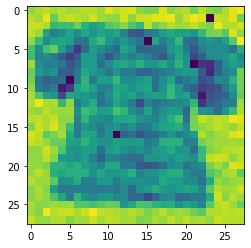

In [26]:
import matplotlib.pyplot as plt

def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[0]) # 0 is the index of the training image you want to display

In [7]:
from google.colab import files
uploaded = files.upload()

Saving train_labels.csv to train_labels.csv


In [8]:
from google.colab import files
uploaded = files.upload()

Saving label_int_to_str_mapping.csv to label_int_to_str_mapping.csv


In [0]:
import pandas as pd

In [0]:
df_train_label = pd.read_csv("train_labels.csv")

In [13]:
print(df_train_label)

          ID  label
0          0      6
1          1      4
2          2      6
3          3      1
4          4      8
...      ...    ...
49995  49995      0
49996  49996      9
49997  49997      7
49998  49998      3
49999  49999      2

[50000 rows x 2 columns]


In [0]:
train_labels = df_train_label.label.values

In [20]:
print(train_labels)

[6 4 6 ... 7 3 2]


Storing the image mapping code.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
train_images.shape # there are 50,000 images in the training set, with each image represented as 28 x 28 pixels.

(50000, 28, 28)

In [22]:
train_labels  # eacj abel is an integer

array([6, 4, 6, ..., 7, 3, 2])

Preprocessing the Data

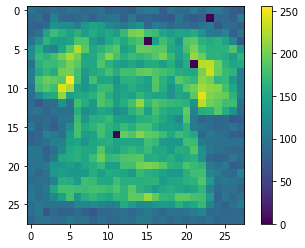

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scaling the values to a range of 0 to 1 before feeding into the neural network mode. Dividing the values by 255 to do so.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Verifying that the data is in the correct format and that we're ready to building and training the network BY displaying the first 25 images from the training set and displaying the class name below each image.

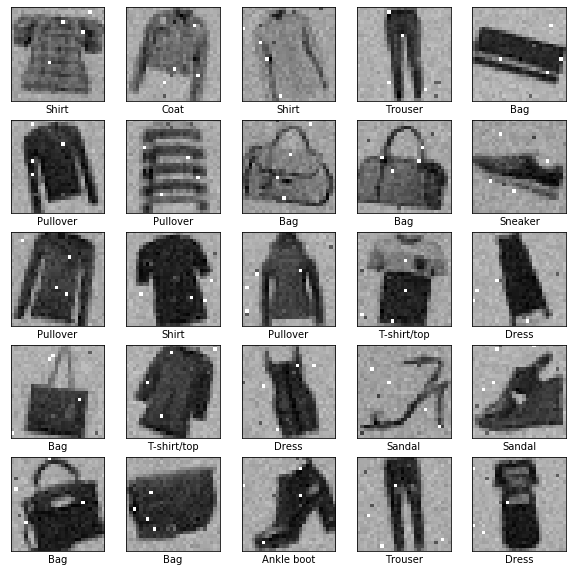

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Buiulding the Model**
To build the neural network, we need to do two things:
1. configuring the layers of the model
2. compiling the model

**Setting up the Layers**
The *layer* is the basic building block of a neural network.

Most of deep learning consist of: chaining together simple layers, and most layers, e.g. tf.keras.layers.Dense, have parameters that are learned during training

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

"The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data."

"After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes"

# Compiling the Model
We need to do a couple more thing before the model is ready for training."These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified." 

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
"Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array. Verify that the predictions match the labels from the test_labels array.
To start training, call the model.fit method—so called because it "fits" the model to the training data:"

In [37]:
model.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 108us/sample - loss: 1.5939 - accuracy: 0.4901
Epoch 2/10
50000/50000 [==============================] - 4s 86us/sample - loss: 1.0230 - accuracy: 0.6410
Epoch 3/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.8737 - accuracy: 0.6919
Epoch 4/10
50000/50000 [==============================] - 5s 101us/sample - loss: 0.7980 - accuracy: 0.7126
Epoch 5/10
50000/50000 [==============================] - 4s 83us/sample - loss: 0.7567 - accuracy: 0.7245
Epoch 6/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.7317 - accuracy: 0.7303
Epoch 7/10
50000/50000 [==============================] - 4s 89us/sample - loss: 0.7145 - accuracy: 0.7376
Epoch 8/10
50000/50000 [==============================] - 4s 85us/sample - loss: 0.7000 - accuracy: 0.7415
Epoch 9/10
50000/50000 [==============================] - 4s 84us/sample - loss: 0.6883 - accuracy: 0.7453
Epoch 10/10


# Making Predictions
Since the model is trained, now it's time to use it to make predictions about some images, namely the images in the test dataset.

In [0]:
predictions = model.predict(test_images)

"A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:"

In [41]:
np.argmax(predictions[0])

9

In [50]:
numImages, x,y = test_images.shape
print(numImages)

20000


# Creating the csv file for submission

In [0]:
list_predicted_result = []
for i in range(numImages):
  # print(np.argmax(predictions[i]))
  list_predicted_result.append(np.argmax(predictions[i]))


In [54]:
print(list_predicted_result)

[9, 5, 2, 1, 8, 3, 8, 9, 9, 9, 3, 8, 3, 1, 5, 1, 3, 5, 7, 4, 3, 8, 7, 8, 3, 8, 9, 0, 7, 9, 9, 0, 0, 3, 7, 5, 7, 2, 1, 7, 7, 1, 6, 5, 1, 0, 0, 6, 1, 4, 8, 4, 6, 9, 4, 0, 8, 8, 1, 6, 5, 5, 2, 1, 7, 2, 2, 6, 4, 2, 5, 8, 5, 5, 7, 2, 9, 7, 0, 2, 2, 8, 6, 9, 3, 7, 5, 2, 3, 9, 0, 3, 1, 4, 7, 6, 2, 2, 3, 2, 1, 5, 7, 9, 4, 5, 9, 9, 8, 8, 1, 4, 6, 5, 5, 6, 2, 7, 1, 4, 2, 7, 4, 7, 2, 0, 8, 4, 8, 7, 9, 6, 4, 4, 8, 1, 4, 7, 4, 8, 2, 0, 3, 9, 3, 4, 5, 4, 6, 8, 4, 7, 4, 0, 5, 9, 2, 6, 7, 4, 3, 1, 2, 2, 0, 3, 8, 6, 4, 5, 2, 6, 2, 4, 5, 2, 4, 3, 3, 2, 0, 9, 9, 8, 6, 0, 8, 0, 5, 6, 4, 1, 4, 1, 1, 7, 3, 3, 8, 7, 2, 2, 8, 5, 7, 2, 4, 9, 8, 4, 0, 4, 9, 5, 7, 2, 1, 0, 6, 4, 1, 3, 5, 7, 2, 5, 1, 3, 3, 0, 7, 5, 1, 1, 8, 3, 2, 1, 7, 1, 3, 6, 9, 7, 5, 4, 1, 8, 7, 8, 3, 8, 2, 0, 5, 0, 1, 6, 3, 2, 7, 6, 4, 3, 9, 2, 8, 7, 5, 6, 0, 2, 2, 5, 4, 0, 4, 9, 5, 2, 1, 1, 1, 5, 4, 2, 8, 8, 7, 8, 8, 7, 0, 7, 1, 0, 5, 0, 3, 9, 4, 0, 9, 4, 6, 2, 4, 0, 0, 4, 2, 2, 0, 8, 6, 8, 3, 2, 3, 8, 7, 9, 3, 0, 9, 0, 8, 3, 8, 1, 1, 8, 4, 

In [0]:
list_index = [i for i in range(20000)]

In [60]:
print(list_index)
print(len(list_index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [0]:
df_test_predictions_index = pd.DataFrame({'ID':list_index})

In [74]:
print(df_test_predictions_index)

          ID
0          0
1          1
2          2
3          3
4          4
...      ...
19995  19995
19996  19996
19997  19997
19998  19998
19999  19999

[20000 rows x 1 columns]


In [72]:
df_test_predictions_result = pd.DataFrame({'label':list_predicted_result})
print(df_test_predictions_result)

       label
0          9
1          5
2          2
3          1
4          8
...      ...
19995      3
19996      2
19997      3
19998      8
19999      6

[20000 rows x 1 columns]


In [0]:
# Merging the dataframes
df_final = pd.concat([df_test_predictions_index, df_test_predictions_result], axis=1)

In [77]:
print(df_final)

          ID  label
0          0      9
1          1      5
2          2      2
3          3      1
4          4      8
...      ...    ...
19995  19995      3
19996  19996      2
19997  19997      3
19998  19998      8
19999  19999      6

[20000 rows x 2 columns]


In [0]:
df_final.to_csv("ys_maisA4_01.csv")

In [0]:
from google.colab import files
files.download("ys_maisA4_01.csv")